In [1]:
#libraries
import os
import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform

In [2]:
#Change the directory
os.chdir("E:\Edvisor Project")

In [3]:
#load the csv file
bike_rental_data = pd.read_csv("Day.csv" ,index_col = 0)

Missing Value Analysis

In [4]:
#Calculate the null values in the dataframe
missing_value = pd.DataFrame(bike_rental_data.isnull().sum())
missing_value = (missing_value/len(bike_rental_data))*100
missing_value.reset_index()

missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False)
#save output results 
missing_value.to_csv("Missing_perc.csv", index = False)
missing_value

#There is no missing value in the dataframe

,Missing_percentage
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0
atemp,0.0


Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x28e222dbef0>,
 'caps': [<matplotlib.lines.Line2D at 0x28e222ed860>,
 'boxes': [<matplotlib.lines.Line2D at 0x28e222dbd68>],
 'medians': [<matplotlib.lines.Line2D at 0x28e222edef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28e222edfd0>],
 'means': []}

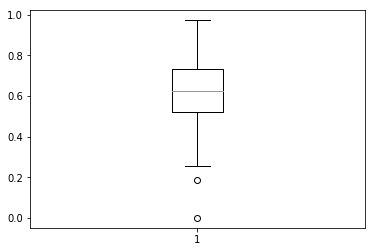

In [5]:
#Negative outlier found in hum 
%matplotlib inline
plt.boxplot(bike_rental_data['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28e2236ae10>,
 'caps': [<matplotlib.lines.Line2D at 0x28e223764e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28e2236a9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x28e22376b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x28e22376eb8>],
 'means': []}

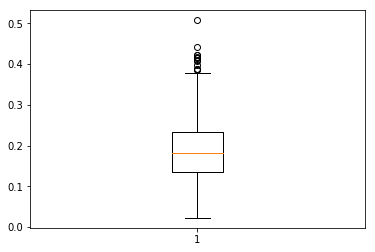

In [6]:
%matplotlib inline
plt.boxplot(bike_rental_data['windspeed'])

#Postive outliers found in windspeed

In [7]:
cnames = ["dteday","yr","season","mnth","workingday","weekday","weathersit","temp","atemp","hum","windspeed"]
pnames = ["temp","hum","windspeed"]

In [8]:
#Detect & Delete Outliers
for i in pnames :
    print (i)
    q75,q25 = np.percentile(bike_rental_data.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    bike_rental_data = bike_rental_data.drop(bike_rental_data[bike_rental_data.loc[:,i] < min].index)
    bike_rental_data = bike_rental_data.drop(bike_rental_data[bike_rental_data.loc[:,i] > max].index)  

temp
-0.14041600000000015
1.1329160000000003
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585


In [9]:
#Converting redpective variables to required data format 
bike_rental_data['dteday'] = pd.to_datetime(bike_rental_data['dteday'],yearfirst=True)
bike_rental_data['season'] = bike_rental_data['season'].astype('category')
bike_rental_data['yr'] = bike_rental_data['yr'].astype('category')
bike_rental_data['mnth'] = bike_rental_data['mnth'].astype('category')
bike_rental_data['holiday'] = bike_rental_data['holiday'].astype('category')
bike_rental_data['weekday'] = bike_rental_data['weekday'].astype('category')
bike_rental_data['workingday'] = bike_rental_data['workingday'].astype('category')
bike_rental_data['weathersit'] = bike_rental_data['weathersit'].astype('category')

bike_rental_data['temp'] = bike_rental_data['temp'].astype('float')
bike_rental_data['atemp'] = bike_rental_data['atemp'].astype('float')
bike_rental_data['hum'] = bike_rental_data['hum'].astype('float')
bike_rental_data['windspeed'] = bike_rental_data['windspeed'].astype('float')
bike_rental_data['casual'] = bike_rental_data['casual'].astype('float')
bike_rental_data['registered'] = bike_rental_data['registered'].astype('float')
bike_rental_data['cnt'] = bike_rental_data['cnt'].astype('float')

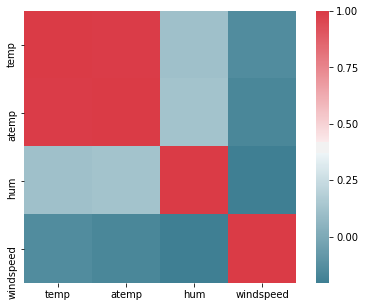

In [10]:
##Feature selection o the basis of various features like correlation, multicollinearity.
#Correlation Plot
df_corr = bike_rental_data.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [11]:
#Chi Square Test of Independence
#Saving Categorical Numbers
cat_names = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [12]:
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_rental_data['cnt'], bike_rental_data[i]))
    print(dof)

season
2049
yr
683
mnth
7513
holiday
683
weekday
4098
workingday
683
weathersit
1366


In [13]:
#Removing variables atemp beacuse it is highly correlated with temp,
#Removing weekday,holiday because they don;t contribute much to the independent cariable
#Removing Causal and registered becuase that's what we need to predict.

bike_rental_data = bike_rental_data.drop(['atemp','holiday','workingday','casual','registered'], axis =1)

Exploratory Data Analysis

C:\Users\Deepak Jaiswal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


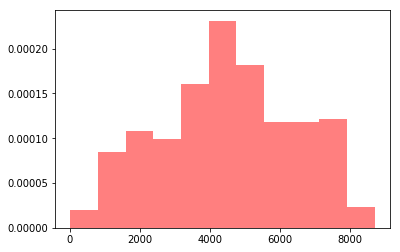

In [14]:
#Distribution of cnt
%matplotlib inline

num_bins = 11
plt.hist(bike_rental_data['cnt'], num_bins, normed=1, facecolor='red', alpha=0.5)
plt.show()

mnth
1     61
2     53
3     58
4     58
5     62
6     60
7     62
8     62
9     60
10    60
11    60
12    61
dtype: int64


Text(0, 0.5, 'Total Bikes Rented')

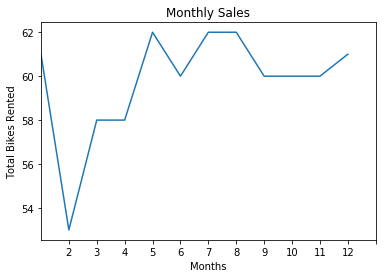

In [15]:
#Bike Rentals Monthly
sales_by_month = bike_rental_data.groupby('mnth').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Bikes Rented')

Text(0, 0.5, 'Total BIkes Rented')

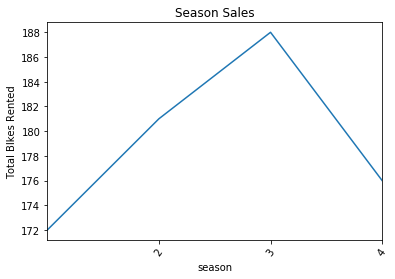

In [16]:
#Sales by Season
sales_by_weekday = bike_rental_data.groupby('season').size()
plot_by_day = sales_by_weekday.plot(title='Season Sales',xticks=(range(1,4)),rot=55)
plot_by_day.set_xlabel('season')
plot_by_day.set_ylabel('Total BIkes Rented')

In [17]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [18]:
#Divide data into train and test
X = bike_rental_data.values[:,1:9]
Y = bike_rental_data.values[:,9]

X_train,y_train,X_test,y_test = train_test_split( X, Y, test_size = 0.2)

In [19]:
from sklearn.ensemble import RandomForestRegressor

#RF_model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
RF_model.fit(X_train, X_test);

# Use the forest's predict method on the test data
predictions = RF_model.predict(y_train)
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [20]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 85.64 %.


##Conclusion
#Random Forect Model hs been developed and result calculated. 